In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'

In [2]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
iris = load_iris()

In [3]:
X, y = iris.data, iris.target
X, y = shuffle(X, y)

In [4]:
print(X[:30])

[[ 4.5  2.3  1.3  0.3]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.3  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 5.6  2.7  4.2  1.3]
 [ 5.5  2.4  3.8  1.1]
 [ 6.   2.2  5.   1.5]
 [ 7.6  3.   6.6  2.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.6  3.6  1.   0.2]
 [ 6.1  3.   4.9  1.8]
 [ 5.8  2.7  5.1  1.9]
 [ 6.4  2.8  5.6  2.1]
 [ 4.4  3.   1.3  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 6.5  3.   5.2  2. ]
 [ 5.   3.2  1.2  0.2]
 [ 5.8  2.7  5.1  1.9]
 [ 4.3  3.   1.1  0.1]
 [ 5.7  2.6  3.5  1. ]
 [ 4.6  3.4  1.4  0.3]
 [ 6.6  2.9  4.6  1.3]
 [ 6.3  2.8  5.1  1.5]
 [ 7.7  2.8  6.7  2. ]
 [ 6.5  3.2  5.1  2. ]
 [ 4.8  3.4  1.9  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.2  3.4  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.6  0.2]]


In [5]:
# a column is mostly missing
rng = np.random.RandomState(0)
X_missing_column = X.copy()
mask = X.sum(axis=1) < rng.normal(loc=19, scale=3, size=X.shape[0])
X_missing_column[mask, 0] = np.NaN
X_missing_column[120:]

array([[ nan,  3. ,  5.1,  1.8],
       [ 6.7,  3. ,  5.2,  2.3],
       [ nan,  3.4,  5.6,  2.4],
       [ nan,  3.1,  1.6,  0.2],
       [ nan,  2.5,  3.9,  1.1],
       [ 7.2,  3.6,  6.1,  2.5],
       [ nan,  2.8,  5.1,  2.4],
       [ nan,  2.2,  4. ,  1. ],
       [ nan,  2.6,  5.6,  1.4],
       [ nan,  3.2,  1.3,  0.2],
       [ 6.7,  2.5,  5.8,  1.8],
       [ nan,  3.3,  5.7,  2.5],
       [ nan,  2.8,  4. ,  1.3],
       [ nan,  3.1,  4.9,  1.5],
       [ nan,  2.3,  4. ,  1.3],
       [ nan,  3.1,  4.4,  1.4],
       [ nan,  3.3,  5.7,  2.1],
       [ nan,  3.5,  1.4,  0.3],
       [ nan,  4.2,  1.4,  0.2],
       [ 7.1,  3. ,  5.9,  2.1],
       [ 6. ,  3. ,  4.8,  1.8],
       [ nan,  2.4,  3.7,  1. ],
       [ nan,  3. ,  4.5,  1.5],
       [ nan,  3.1,  4.7,  1.5],
       [ nan,  3. ,  4.6,  1.4],
       [ nan,  2.4,  3.3,  1. ],
       [ nan,  3.4,  1.7,  0.2],
       [ nan,  2.8,  6.1,  1.9],
       [ nan,  3.4,  1.5,  0.2],
       [ nan,  3.1,  1.5,  0.1]])

In [6]:
# only a few rows have missing data. but a lot of it
rng = np.random.RandomState(4)
X_missing_rows = X.copy()
for i in rng.randint(0, 30, 5):
    X_missing_rows[i, rng.uniform(size=4)> .2] = np.NaN
X_missing_rows[:30]

array([[ 4.5,  2.3,  1.3,  0.3],
       [ nan,  nan,  1.6,  0.2],
       [ 5. ,  3.3,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 5.6,  2.7,  4.2,  1.3],
       [ nan,  nan,  nan,  nan],
       [ 6. ,  2.2,  5. ,  1.5],
       [ 7.6,  3. ,  6.6,  2.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 6.1,  3. ,  4.9,  1.8],
       [ 5.8,  2.7,  5.1,  1.9],
       [ 6.4,  2.8,  5.6,  2.1],
       [ 4.4,  3. ,  1.3,  0.2],
       [ nan,  nan,  nan,  nan],
       [ 6.5,  3. ,  5.2,  2. ],
       [ 5. ,  3.2,  1.2,  0.2],
       [ 5.8,  2.7,  5.1,  1.9],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.7,  2.6,  3.5,  1. ],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 6.6,  2.9,  4.6,  1.3],
       [ 6.3,  2.8,  5.1,  1.5],
       [ 7.7,  nan,  nan,  nan],
       [ 6.5,  3.2,  5.1,  2. ],
       [ 4.8,  3.4,  1.9,  0.2],
       [ nan,  nan,  nan,  0.4],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2]])

In [7]:
X[y==2].mean(axis=0)

array([ 6.588,  2.974,  5.552,  2.026])

In [8]:
# some values missing only
rng = np.random.RandomState(0)
X_some_missing = X.copy()
mask = np.abs(X[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask, 3] = np.NaN
# different random numbers
mask2 = np.abs(X[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask2, 2] = np.NaN
X_some_missing[:30]

array([[ 4.5,  2.3,  1.3,  0.3],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.3,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 5.6,  2.7,  4.2,  1.3],
       [ 5.5,  2.4,  3.8,  1.1],
       [ 6. ,  2.2,  5. ,  1.5],
       [ 7.6,  3. ,  6.6,  2.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 6.1,  3. ,  nan,  1.8],
       [ 5.8,  2.7,  5.1,  1.9],
       [ 6.4,  2.8,  nan,  nan],
       [ 4.4,  3. ,  1.3,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 6.5,  3. ,  5.2,  nan],
       [ 5. ,  3.2,  1.2,  0.2],
       [ 5.8,  2.7,  5.1,  nan],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.7,  2.6,  3.5,  1. ],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 6.6,  2.9,  4.6,  1.3],
       [ 6.3,  2.8,  5.1,  1.5],
       [ 7.7,  2.8,  6.7,  2. ],
       [ 6.5,  3.2,  nan,  2. ],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2]])

In [9]:
np.mean(mask)

0.22666666666666666

In [10]:
np.bincount(y[~mask2])

array([50, 39, 25])

In [11]:
# from now on use X_ = X_some_missing
X_ = X_some_missing

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_, y, stratify=y, random_state=0)

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

nan_columns = np.any(np.isnan(X_train), axis=0)
X_drop_columns = X_train[:, ~nan_columns]
logreg = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(logreg, X_drop_columns, y_train, cv=10)
np.mean(scores)

0.78111111111111109

In [14]:
print(X_train[-30:])

[[ 5.8  2.7  4.1  1. ]
 [ 6.1  2.6  5.6  nan]
 [ 5.   3.4  1.6  0.4]
 [ 4.9  3.1  1.5  0.1]
 [ 5.1  3.5  1.4  0.3]
 [ 4.6  3.6  1.   0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 6.7  3.1  4.4  1.4]
 [ 6.3  3.3  6.   nan]
 [ 6.   3.   nan  nan]
 [ 7.7  3.   6.1  2.3]
 [ 4.8  3.   1.4  0.1]
 [ 6.9  3.1  nan  2.3]
 [ 5.   3.3  1.4  0.2]
 [ 6.4  2.8  nan  nan]
 [ 5.1  3.8  1.6  0.2]
 [ 6.1  2.8  4.   1.3]
 [ 5.5  2.5  nan  1.3]
 [ 5.   2.3  3.3  1. ]
 [ 7.   3.2  4.7  1.4]
 [ 5.4  3.4  1.5  0.4]
 [ 6.7  3.3  nan  nan]
 [ 6.4  2.8  nan  nan]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  2.5  3.   1.1]
 [ 6.4  3.2  4.5  nan]
 [ 5.1  3.8  1.9  0.4]
 [ 7.3  2.9  nan  nan]
 [ 7.2  3.6  6.1  2.5]
 [ 7.7  2.6  6.9  2.3]]


In [15]:
np.set_printoptions(precision=3)

In [16]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy="mean").fit(X_train)
X_mean_imp = imp.transform(X_train)
X_mean_imp[-30:]

array([[ 5.8  ,  2.7  ,  4.1  ,  1.   ],
       [ 6.1  ,  2.6  ,  5.6  ,  0.991],
       [ 5.   ,  3.4  ,  1.6  ,  0.4  ],
       [ 4.9  ,  3.1  ,  1.5  ,  0.1  ],
       [ 5.1  ,  3.5  ,  1.4  ,  0.3  ],
       [ 4.6  ,  3.6  ,  1.   ,  0.2  ],
       [ 4.4  ,  2.9  ,  1.4  ,  0.2  ],
       [ 6.7  ,  3.1  ,  4.4  ,  1.4  ],
       [ 6.3  ,  3.3  ,  6.   ,  0.991],
       [ 6.   ,  3.   ,  3.392,  0.991],
       [ 7.7  ,  3.   ,  6.1  ,  2.3  ],
       [ 4.8  ,  3.   ,  1.4  ,  0.1  ],
       [ 6.9  ,  3.1  ,  3.392,  2.3  ],
       [ 5.   ,  3.3  ,  1.4  ,  0.2  ],
       [ 6.4  ,  2.8  ,  3.392,  0.991],
       [ 5.1  ,  3.8  ,  1.6  ,  0.2  ],
       [ 6.1  ,  2.8  ,  4.   ,  1.3  ],
       [ 5.5  ,  2.5  ,  3.392,  1.3  ],
       [ 5.   ,  2.3  ,  3.3  ,  1.   ],
       [ 7.   ,  3.2  ,  4.7  ,  1.4  ],
       [ 5.4  ,  3.4  ,  1.5  ,  0.4  ],
       [ 6.7  ,  3.3  ,  3.392,  0.991],
       [ 6.4  ,  2.8  ,  3.392,  0.991],
       [ 5.4  ,  3.4  ,  1.7  ,  0.2  ],
       [ 5.1  , 

In [17]:
X_mean_imp.shape

(112, 4)

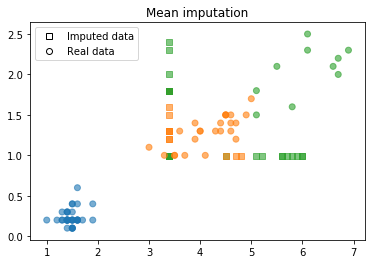

In [18]:
import matplotlib.patches as patches
imputed_mask = np.any(np.isnan(X_train), axis=1)

def plot_imputation(X_imp, title=None, ax=None):
    # helper function to plot imputed data points
    if ax is None:
        ax = plt.gca()
    if title is not None:
        ax.set_title(title)
    ax.scatter(X_imp[imputed_mask, 2], X_imp[imputed_mask, 3], c=plt.cm.Vega10(y_train[imputed_mask]), alpha=.6, marker="s")
    ax.scatter(X_imp[~imputed_mask, 2], X_imp[~imputed_mask, 3], c=plt.cm.Vega10(y_train[~imputed_mask]), alpha=.6)
    # this is for creating the legend...
    square = plt.Line2D((0,), (0,), linestyle='', marker="s", markerfacecolor="w", markeredgecolor="k", label='Imputed data')
    circle = plt.Line2D((0,), (0,), linestyle='', marker="o", markerfacecolor="w", markeredgecolor="k", label='Real data')
    plt.legend(handles=[square, circle], numpoints=1, loc="best")

plot_imputation(X_mean_imp, "Mean imputation")

In [19]:
# I designed the problem so that mean imputation wouldn't work - slightly different than in lecture!

In [20]:
mean_pipe = make_pipeline(Imputer(), StandardScaler(), LogisticRegression())
scores = cross_val_score(mean_pipe, X_train, y_train, cv=10)
np.mean(scores)

0.74222222222222223

# Model-driven imputation and KNN

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# imput feature 2 with KNN
feature2_missing = np.isnan(X_train[:, 2])
knn_feature2 = KNeighborsRegressor().fit(X_train[~feature2_missing, :2],
                                         X_train[~feature2_missing, 2])

X_train_knn2 = X_train.copy()
X_train_knn2[feature2_missing, 2] = knn_feature2.predict(X_train[feature2_missing, :2])

In [22]:
# impute feature 3 with KNN
feature3_missing = np.isnan(X_train[:, 3])
knn_feature3 = KNeighborsRegressor().fit(X_train[~feature3_missing, :2],
                                         X_train[~feature3_missing, 3])

X_train_knn3 = X_train_knn2.copy()
X_train_knn3[feature3_missing, 3] = knn_feature3.predict(X_train[feature3_missing, :2])

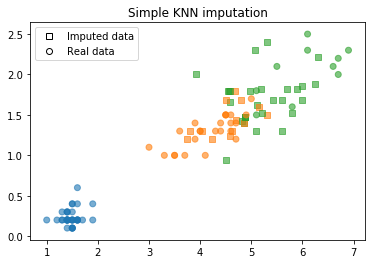

In [23]:
plot_imputation(X_train_knn3, "Simple KNN imputation")

In [24]:
# this is cheating because I'm not using a pipeline
# we would need to write a transformer that does the imputation
scores = cross_val_score(logreg, X_train_knn3, y_train, cv=10)
np.mean(scores)

0.79388888888888887

In [25]:
from sklearn.ensemble import RandomForestRegressor


# this is just because I'm lazy and don't want to special-case the first iteration
X_imputed = Imputer().fit_transform(X_train)
feature2_missing = np.isnan(X_train[:, 2])
feature3_missing = np.isnan(X_train[:, 3])

inds_not_2 = np.array([0, 1, 3])
inds_not_3 = np.array([0, 1, 2])

rf = RandomForestRegressor(n_estimators=100)

for i in range(10):
    last = X_imputed.copy()
    # imput feature 2 with rf
    
    rf.fit(X_imputed[~feature2_missing][:, inds_not_2], X_train[~feature2_missing, 2])

    X_imputed[feature2_missing, 2] = rf.predict(X_imputed[feature2_missing][:, inds_not_2])

    # impute feature 3 with rf
    
    rf.fit(X_imputed[~feature3_missing][:, inds_not_3], X_train[~feature3_missing, 3])
    X_imputed[feature3_missing, 3] = rf.predict(X_imputed[feature3_missing][:, inds_not_3])
    
    # this would make more sense if we scaled the data beforehand
    if (np.linalg.norm(last - X_imputed)) < .5:
        break

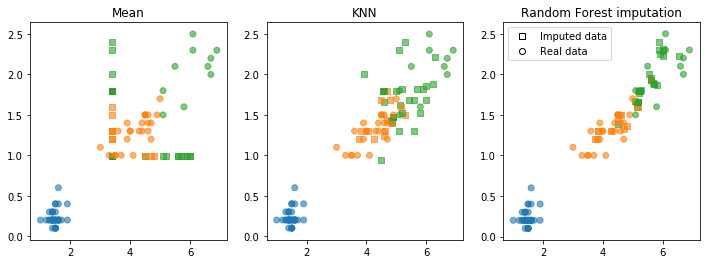

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plot_imputation(X_mean_imp, "Mean", ax=axes[0])
plot_imputation(X_train_knn3, "KNN", ax=axes[1])
plot_imputation(X_imputed, "Random Forest imputation", ax=axes[2])

In [27]:
scores = cross_val_score(logreg, X_imputed, y_train, cv=10)
np.mean(scores)

0.84944444444444456

In [28]:
# you need to pip install fancyimpute for the rest! - and tensorflow
import fancyimpute
X_train_fancy_knn = fancyimpute.KNN().complete(X_train)

Using TensorFlow backend.


Imputing row 1/112 with 1 missing, elapsed time: 0.004
Imputing row 101/112 with 0 missing, elapsed time: 0.005


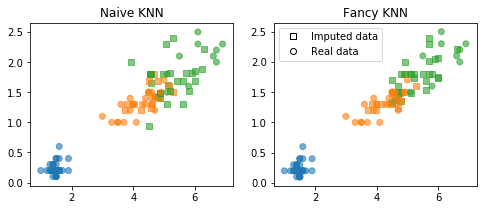

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
plot_imputation(X_train_knn3, "Naive KNN", ax=ax[0])
plot_imputation(X_train_fancy_knn, "Fancy KNN", ax=ax[1])

In [30]:
X_train_fancy_simple = fancyimpute.SimpleFill().complete(X_train)
X_train_fancy_mice = fancyimpute.MICE(verbose=0).complete(X_train)
X_train_fancy_si = fancyimpute.SoftImpute(verbose=0).complete(X_train)

/home/andy/anaconda3/lib/python3.6/site-packages/fancyimpute/soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold


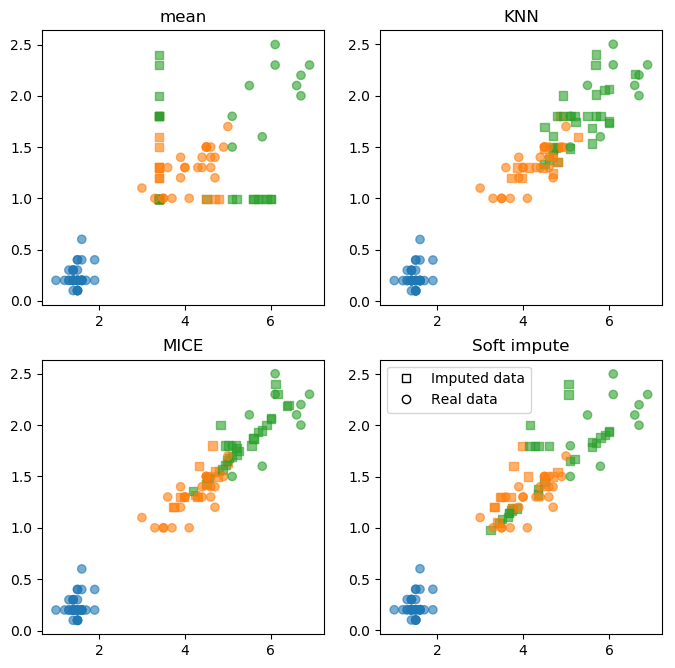

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=100)
for ax, name, X_imp in zip(axes.ravel(), ["mean", "KNN", "MICE", "Soft impute"],
                           [X_train_fancy_simple, X_train_fancy_knn, X_train_fancy_mice, X_train_fancy_si]):
    plot_imputation(X_imp, name, ax=ax)
plt.savefig("images/fancy_impute_comparison.png")

In [32]:
mice = fancyimpute.MICE(verbose=0)
X_train_fancy_mice = mice.complete(X_train)
scores = cross_val_score(logreg, X_train_fancy_mice, y_train, cv=10)
scores.mean()

0.83944444444444444

# Feature Selection

In [33]:
from sklearn.datasets import load_boston

In [34]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [35]:
from sklearn.preprocessing import scale
X_train_scaled = scale(X_train)
cov = np.cov(X_train_scaled, rowvar=False)

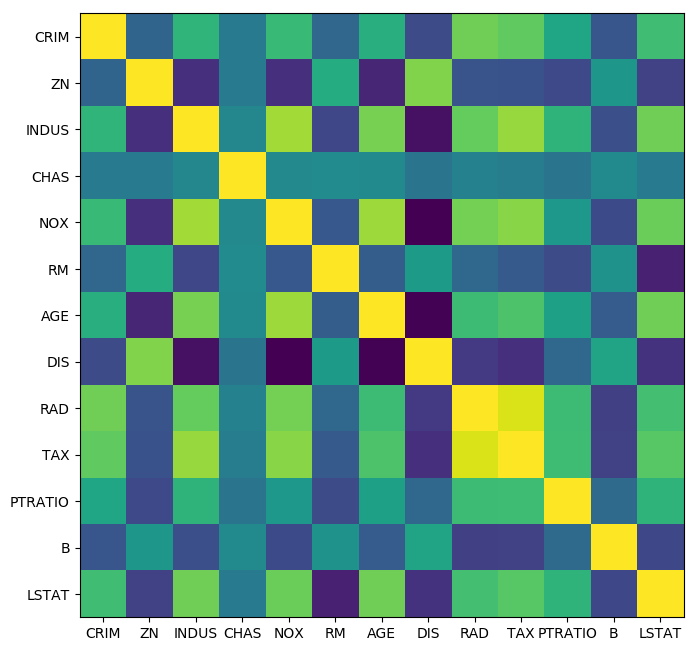

In [36]:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cov)
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.yticks(range(X.shape[1]), boston.feature_names);

In [37]:
from scipy.cluster import hierarchy
order = np.array(hierarchy.dendrogram(hierarchy.ward(cov), no_plot=True)['ivl'], dtype="int")

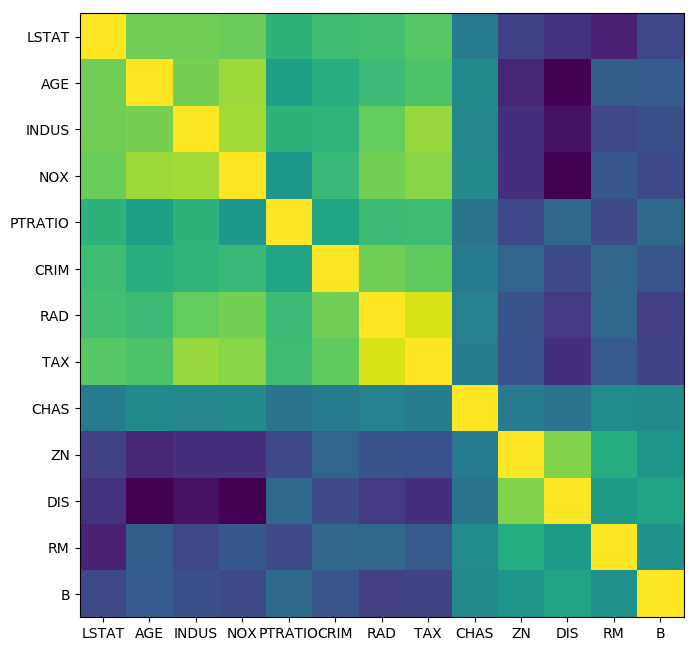

In [38]:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cov[order, :][:, order])
plt.xticks(range(X.shape[1]), boston.feature_names[order])
plt.yticks(range(X.shape[1]), boston.feature_names[order]);

# Supervised feature selection

In [39]:
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(X, y)

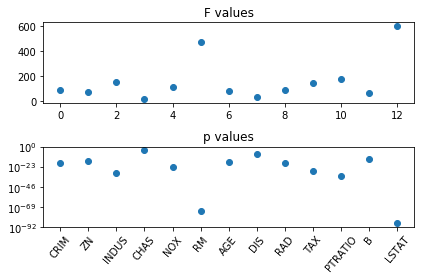

In [40]:
fig, ax = plt.subplots(2, 1)
ax[0].set_title("F values")
ax[0].plot(f_values, 'o')
ax[1].set_title("p values")
ax[1].plot(p_values, 'o')
ax[1].set_yscale("log")

ax[1].set_xticks(range(X.shape[1]))
ax[1].set_xticklabels(boston.feature_names, rotation=50);
fig.tight_layout()

In [41]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr
from sklearn.linear_model import RidgeCV

select = SelectKBest(k=2, score_func=f_regression)
select.fit(X_train, y_train)
print(X_train.shape)
print(select.transform(X_train).shape)

(379, 13)
(379, 2)


In [42]:
all_features = make_pipeline(StandardScaler(), RidgeCV())
select_2 = make_pipeline(StandardScaler(), SelectKBest(k=2, score_func=f_regression), RidgeCV())

In [43]:
np.mean(cross_val_score(all_features, X_train, y_train, cv=10))

0.71798347520832284

In [44]:
np.mean(cross_val_score(select_2, X_train, y_train, cv=10))

0.62436257491684333

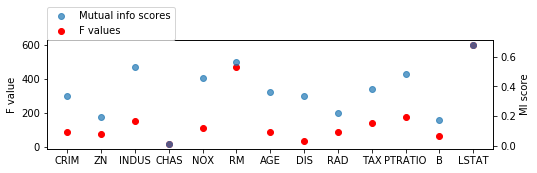

In [45]:
from sklearn.feature_selection import mutual_info_regression
scores = mutual_info_regression(X_train, y_train, discrete_features=[3])

fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(f_values, 'o', c='r')
plt.ylabel("F value")
ax2 = plt.twinx()
line_s, = ax2.plot(scores, 'o', alpha=.7)
ax2.set_ylabel("MI score")
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["Mutual info scores", "F values"], loc=(0, 1))

In [46]:
from sklearn.linear_model import LassoCV
X_train_scaled = scale(X_train)
lasso = LassoCV().fit(X_train_scaled, y_train)
print(lasso.coef_)

[-0.881  0.951 -0.082  0.59  -1.69   2.639 -0.146 -2.796  1.695 -1.614
 -2.133  0.729 -3.615]


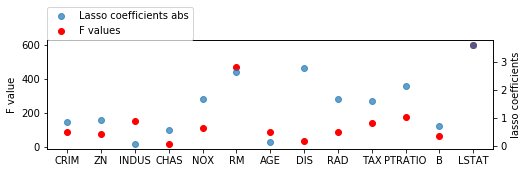

In [47]:
fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(f_values, 'o', c='r')
plt.ylabel("F value")
ax2 = plt.twinx()
ax2.set_ylabel("lasso coefficients")
line_s, = ax2.plot(np.abs(lasso.coef_), 'o', alpha=.7)
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["Lasso coefficients abs", "F values"], loc=(0, 1))

In [48]:
from sklearn.linear_model import Lasso
X_train_scaled = scale(X_train)
lasso = Lasso().fit(X_train_scaled, y_train)
print(lasso.coef_)

[-0.     0.    -0.     0.    -0.     2.529 -0.    -0.    -0.    -0.228
 -1.701  0.132 -3.606]


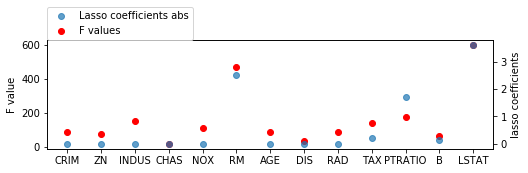

In [49]:
fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(f_values, 'o', c='r')
plt.ylabel("F value")
ax2 = plt.twinx()
ax2.set_ylabel("lasso coefficients")
line_s, = ax2.plot(np.abs(lasso.coef_), 'o', alpha=.7)
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["Lasso coefficients abs", "F values"], loc=(0, 1))

In [50]:
from sklearn.feature_selection import SelectFromModel
select_lassocv = SelectFromModel(LassoCV(), threshold="median")
select_lassocv.fit(X_train, y_train)
print(select_lassocv.transform(X_train).shape)

(379, 7)


In [51]:
pipe_lassocv = make_pipeline(StandardScaler(), select_lassocv, RidgeCV())
np.mean(cross_val_score(pipe_lassocv, X_train, y_train, cv=10))

0.71201380279707793

In [52]:
np.mean(cross_val_score(all_features, X_train, y_train, cv=10))

0.71798347520832284

In [53]:
# could grid-search alpha in lasso
select_lasso = SelectFromModel(Lasso())
pipe_lasso = make_pipeline(StandardScaler(), select_lasso, RidgeCV())
np.mean(cross_val_score(pipe_lasso, X_train, y_train, cv=10))

0.67051240477576868

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# create ranking among all features by selecting only one
rfe = RFE(LinearRegression(), n_features_to_select=1)
rfe.fit(X_train_scaled, y_train)
rfe.ranking_

array([ 9,  8, 13, 11,  5,  2, 12,  4,  7,  6,  3, 10,  1])

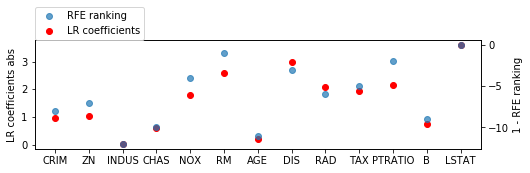

In [55]:
lr = LinearRegression().fit(X_train_scaled, y_train)
fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(np.abs(lr.coef_), 'o', c='r')
plt.ylabel("LR coefficients abs")
ax2 = plt.twinx()
ax2.set_ylabel("1 - RFE ranking")
line_s, = ax2.plot(1 - rfe.ranking_, 'o', alpha=.7)
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["RFE ranking", "LR coefficients"], loc=(0, 1))

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

rfe = RFECV(LinearRegression(), cv=10)
rfe.fit(X_train_scaled, y_train)
print(rfe.support_)
print(boston.feature_names[rfe.support_])

[ True  True False  True  True  True False  True  True  True  True  True
  True]
['CRIM' 'ZN' 'CHAS' 'NOX' 'RM' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


In [57]:
pipe_rfe_ridgecv = make_pipeline(StandardScaler(), RFECV(LinearRegression(), cv=10), RidgeCV())
np.mean(cross_val_score(pipe_rfe_ridgecv, X_train, y_train, cv=10))

0.71019583375843598

In [58]:
from sklearn.preprocessing import PolynomialFeatures
pipe_rfe_ridgecv = make_pipeline(StandardScaler(), PolynomialFeatures(), RFECV(LinearRegression(), cv=10), RidgeCV())
np.mean(cross_val_score(pipe_rfe_ridgecv, X_train, y_train, cv=10))

0.82031507795494429

In [59]:
pipe_rfe_ridgecv.fit(X_train, y_train)
print(pipe_rfe_ridgecv.named_steps['rfecv'].support_)

[False  True  True  True False  True  True  True False  True  True False
  True  True False  True  True  True  True False False False  True  True
  True False False  True  True False  True False False False False  True
  True  True False  True False False False  True  True  True  True  True
  True  True False  True False False  True False False False  True False
 False False  True  True  True  True  True False False False  True  True
 False  True  True False False False False  True  True False  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True False  True False  True False False False  True]


In [60]:
from mlxtend.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(LinearRegression(), forward=False, k_features=7)
sfs.fit(X_train_scaled, y_train)

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
print(sfs.k_feature_idx_)
print(boston.feature_names[np.array(sfs.k_feature_idx_)])

In [ ]:
sfs.k_score_